In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn as sk

In [4]:
import missingno as msno

In [5]:
from sklearn.linear_model import LinearRegression

### Load dataset

In [6]:
os.chdir('..')
path = os.path.join(os.getcwd(), 'Datasets\\real_life_examples.csv')
path

'D:\\Babin\\Internship\\Fusemachine-Internship\\Data Science\\Datasets\\real_life_examples.csv'

In [7]:
raw_data = pd.read_csv(path)
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [9]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

### Visualizing Missing Data

Text(0, 0.5, 'Count')

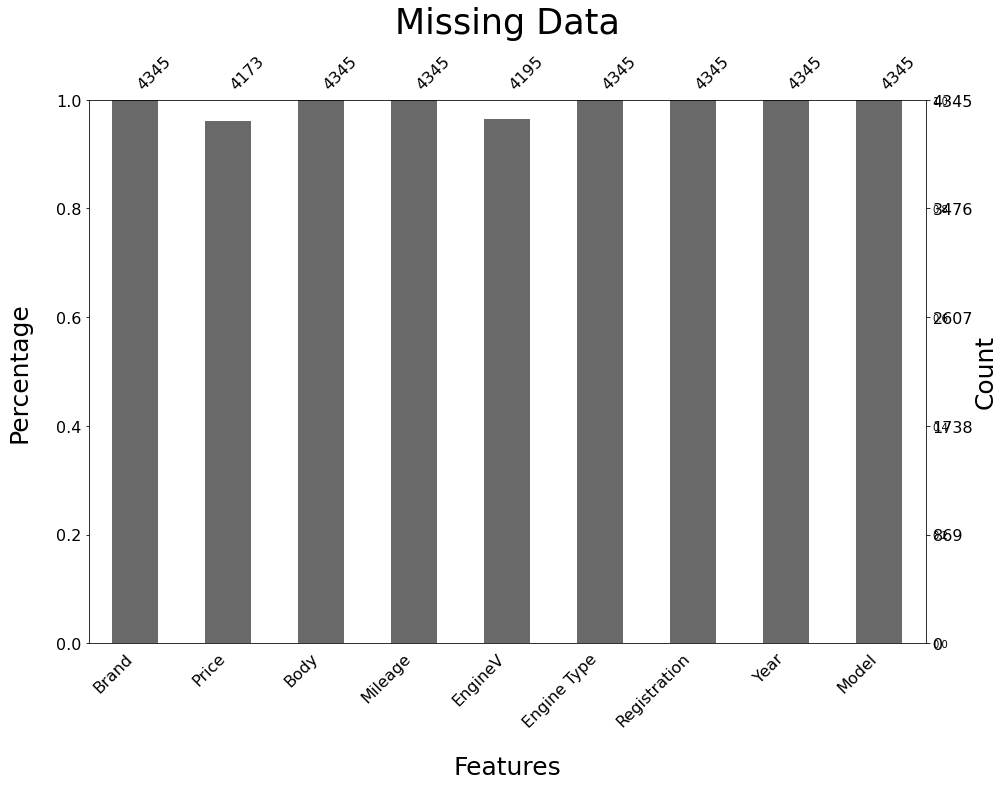

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
msno.bar(raw_data,ax=ax)
ax.set_title('Missing Data',fontdict={'fontsize':35},pad = 20)
ax2 = ax.twinx()
ax.set_xlabel('Features', fontdict={'fontsize':25},labelpad=25)
ax.set_ylabel('Percentage',fontdict={'fontsize':25},labelpad=25)
ax2.set_ylabel('Count',fontdict={'fontsize':25},labelpad=25)

## Preprocessing

### Exploring the descriptive statistics of the variables

In [12]:
raw_data.describe()

Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2.790734  2006.550058
std     25584.242620   105.705797     5.066437     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    86.000000     1.800000  2003.000000
50%     11500.000000   155.000000     2.200000  2008.000000
75%     21700.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000

In [13]:
raw_data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Dealing with missing values

In [14]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [15]:
from sklearn.impute import SimpleImputer

In [16]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [17]:
raw_data[['Price', 'EngineV']]

Price  EngineV
0       4200.0      2.0
1       7900.0      2.9
2      13300.0      5.0
3      23000.0      4.2
4      18300.0      2.0
...        ...      ...
4340  125000.0      3.0
4341    6500.0      3.5
4342    8000.0      2.0
4343   14200.0      NaN
4344   13500.0      2.0

[4345 rows x 2 columns]

In [18]:
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
imp_mean.fit(raw_data[['Price','EngineV']])

SimpleImputer()

In [19]:
imputed_features = imp_mean.transform(raw_data[['Price','EngineV']])
imputed_features

array([[4.20000000e+03, 2.00000000e+00],
       [7.90000000e+03, 2.90000000e+00],
       [1.33000000e+04, 5.00000000e+00],
       ...,
       [8.00000000e+03, 2.00000000e+00],
       [1.42000000e+04, 2.79073421e+00],
       [1.35000000e+04, 2.00000000e+00]])

In [20]:
imputed_df = pd.DataFrame(imputed_features,columns=['Price','EngineV'])
imputed_df.head()

Price  EngineV
0   4200.0      2.0
1   7900.0      2.9
2  13300.0      5.0
3  23000.0      4.2
4  18300.0      2.0

In [21]:
raw_data.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [22]:
raw_data.drop(['Price', 'EngineV'],axis=1,inplace=True)

In [23]:
raw_data = raw_data.merge(imputed_df,left_index=True, right_index=True)

In [24]:
raw_data.shape

(4345, 9)

In [25]:
raw_data.head()

Brand       Body  Mileage Engine Type Registration  Year  \
0            BMW      sedan      277      Petrol          yes  1991   
1  Mercedes-Benz        van      427      Diesel          yes  1999   
2  Mercedes-Benz      sedan      358         Gas          yes  2003   
3           Audi  crossover      240      Petrol          yes  2007   
4         Toyota  crossover      120      Petrol          yes  2011   

          Model    Price  EngineV  
0           320   4200.0      2.0  
1  Sprinter 212   7900.0      2.9  
2         S 500  13300.0      5.0  
3            Q7  23000.0      4.2  
4         Rav 4  18300.0      2.0

In [26]:
raw_data.isnull().sum()

Brand           0
Body            0
Mileage         0
Engine Type     0
Registration    0
Year            0
Model           0
Price           0
EngineV         0
dtype: int64

In [27]:
data_with_no_mv = raw_data

### Exploring thePDFs

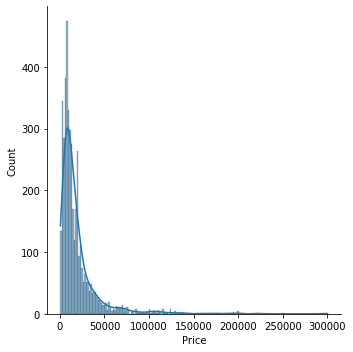

In [28]:
sns.displot(data_with_no_mv['Price'],kde=True)

In [29]:
data_with_no_mv.head(n=2)

Brand   Body  Mileage Engine Type Registration  Year         Model  \
0            BMW  sedan      277      Petrol          yes  1991           320   
1  Mercedes-Benz    van      427      Diesel          yes  1999  Sprinter 212   

    Price  EngineV  
0  4200.0      2.0  
1  7900.0      2.9

### Dealing with Outliers

In [30]:
data_with_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Body          4345 non-null   object 
 2   Mileage       4345 non-null   int64  
 3   Engine Type   4345 non-null   object 
 4   Registration  4345 non-null   object 
 5   Year          4345 non-null   int64  
 6   Model         4345 non-null   object 
 7   Price         4345 non-null   float64
 8   EngineV       4345 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


<AxesSubplot:ylabel='EngineV'>

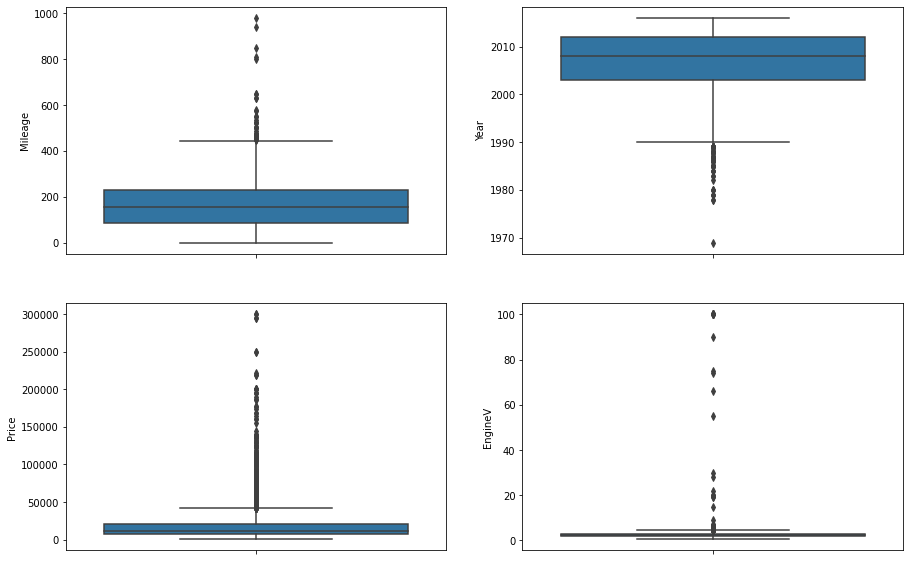

In [38]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(y='Mileage',data=data_with_no_mv,ax=ax[0][0])
sns.boxplot(y='Year',data=data_with_no_mv,ax=ax[0][1])
sns.boxplot(y='Price',data=data_with_no_mv,ax=ax[1][0])
sns.boxplot(y='EngineV',data=data_with_no_mv,ax=ax[1][1])

In [39]:
data_with_no_mv['Price'].mean()

19418.74693505871

In [40]:
q = data_with_no_mv['Price'].quantile(0.99)

In [41]:
data_with_no_mv.shape

(4345, 9)

In [42]:
data1 = data_with_no_mv[data_with_no_mv['Price']<q]
data1.shape

(4298, 9)

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

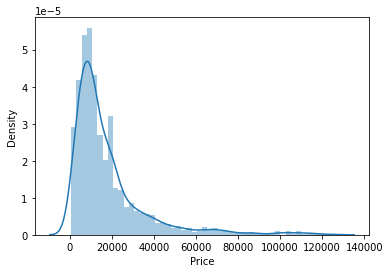

In [43]:
sns.distplot(data1['Price'])

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

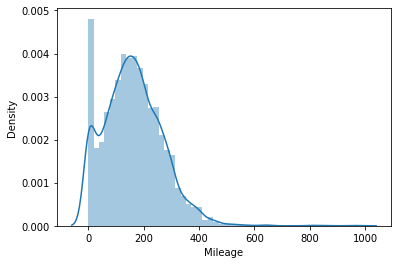

In [44]:
sns.distplot(data1['Mileage'])

In [45]:
q = data1['Mileage'].quantile(0.99)
data2 = data1[data1['Mileage']<q]

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

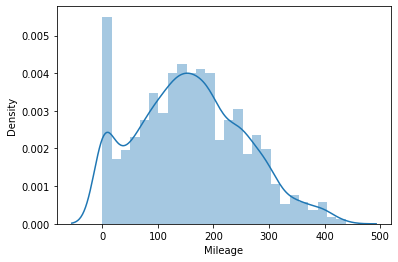

In [46]:
sns.distplot(data2['Mileage'])

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

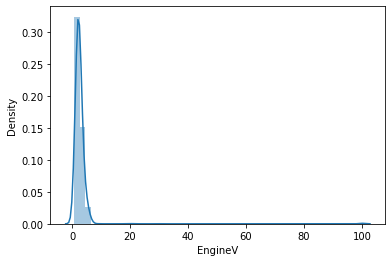

In [47]:
sns.distplot(data_with_no_mv['EngineV'])

In [48]:
data3 = data2[data2['EngineV']<6.5]

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

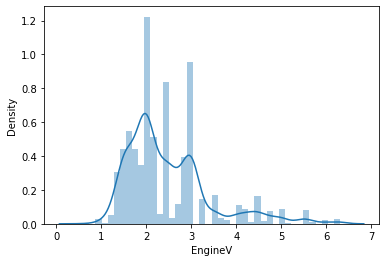

In [49]:
sns.distplot(data3['EngineV'])

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

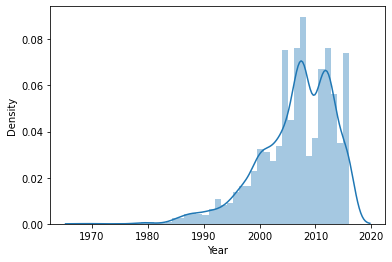

In [50]:
sns.distplot(data3['Year'])

In [51]:
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q]

In [52]:
data4

Brand       Body  Mileage Engine Type Registration  Year  \
0               BMW      sedan      277      Petrol          yes  1991   
1     Mercedes-Benz        van      427      Diesel          yes  1999   
2     Mercedes-Benz      sedan      358         Gas          yes  2003   
3              Audi  crossover      240      Petrol          yes  2007   
4            Toyota  crossover      120      Petrol          yes  2011   
...             ...        ...      ...         ...          ...   ...   
4338     Volkswagen        van      163      Diesel          yes  2008   
4339         Toyota      sedan       35      Petrol          yes  2014   
4341            BMW      sedan        1      Petrol          yes  1999   
4343         Toyota      sedan       31      Petrol          yes  2014   
4344     Volkswagen        van      124      Diesel          yes  2013   

                  Model    Price   EngineV  
0                   320   4200.0  2.000000  
1          Sprinter 212   7900.0  2.900000  
2                 S 500  13300.0  5.000000  
3                    Q7  23000.0  4.200000  
4                 Rav 4  18300.0  2.000000  
...                 ...      ...       ...  
4338   T5 (Transporter)  11500.0  2.500000  
4339            Corolla  17900.0  1.600000  
4341                535   6500.0  3.500000  
4343            Corolla  14200.0  2.790734  
4344  T5 (Transporter)   13500.0  2.000000  

[4172 rows x 9 columns]

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

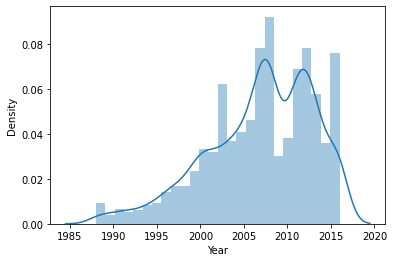

In [53]:
sns.distplot(data4['Year'])

In [54]:
cleaned_data = data4

In [55]:
cleaned_data = cleaned_data.reset_index(drop=True)
cleaned_data

Brand       Body  Mileage Engine Type Registration  Year  \
0               BMW      sedan      277      Petrol          yes  1991   
1     Mercedes-Benz        van      427      Diesel          yes  1999   
2     Mercedes-Benz      sedan      358         Gas          yes  2003   
3              Audi  crossover      240      Petrol          yes  2007   
4            Toyota  crossover      120      Petrol          yes  2011   
...             ...        ...      ...         ...          ...   ...   
4167     Volkswagen        van      163      Diesel          yes  2008   
4168         Toyota      sedan       35      Petrol          yes  2014   
4169            BMW      sedan        1      Petrol          yes  1999   
4170         Toyota      sedan       31      Petrol          yes  2014   
4171     Volkswagen        van      124      Diesel          yes  2013   

                  Model    Price   EngineV  
0                   320   4200.0  2.000000  
1          Sprinter 212   7900.0  2.900000  
2                 S 500  13300.0  5.000000  
3                    Q7  23000.0  4.200000  
4                 Rav 4  18300.0  2.000000  
...                 ...      ...       ...  
4167   T5 (Transporter)  11500.0  2.500000  
4168            Corolla  17900.0  1.600000  
4169                535   6500.0  3.500000  
4170            Corolla  14200.0  2.790734  
4171  T5 (Transporter)   13500.0  2.000000  

[4172 rows x 9 columns]

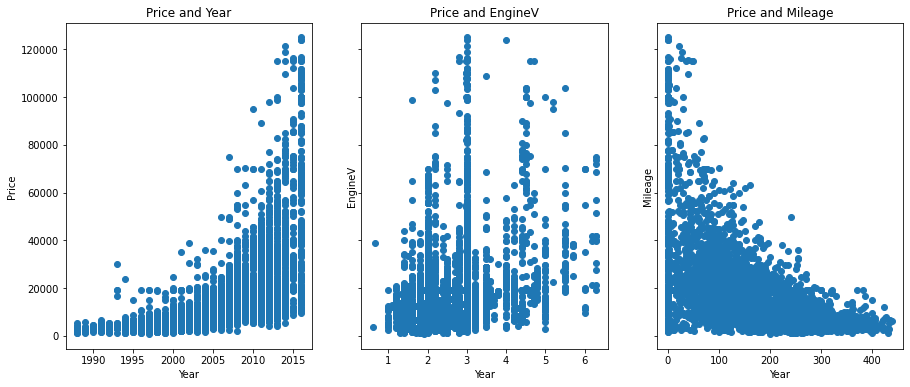

In [63]:
fig, (ax1, ax2, ax3)= plt.subplots(1,3,sharey=True, figsize=(15,6))
ax1.scatter(cleaned_data['Year'], cleaned_data['Price'])
ax1.set_title('Price and Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax2.scatter(cleaned_data['EngineV'], cleaned_data['Price'])
ax2.set_title('Price and EngineV')
ax2.set_ylabel('EngineV')
ax2.set_xlabel('Year')
ax3.scatter(cleaned_data['Mileage'], cleaned_data['Price'])
ax3.set_title('Price and Mileage')
ax3.set_xlabel('Year')
ax3.set_ylabel('Mileage')

plt.show()

In [66]:
log_price = np.log(cleaned_data['Price'])
cleaned_data['log_price'] = log_price
cleaned_data

Brand       Body  Mileage Engine Type Registration  Year  \
0               BMW      sedan      277      Petrol          yes  1991   
1     Mercedes-Benz        van      427      Diesel          yes  1999   
2     Mercedes-Benz      sedan      358         Gas          yes  2003   
3              Audi  crossover      240      Petrol          yes  2007   
4            Toyota  crossover      120      Petrol          yes  2011   
...             ...        ...      ...         ...          ...   ...   
4167     Volkswagen        van      163      Diesel          yes  2008   
4168         Toyota      sedan       35      Petrol          yes  2014   
4169            BMW      sedan        1      Petrol          yes  1999   
4170         Toyota      sedan       31      Petrol          yes  2014   
4171     Volkswagen        van      124      Diesel          yes  2013   

                  Model    Price   EngineV  log_price  
0                   320   4200.0  2.000000   8.342840  
1          Sprinter 212   7900.0  2.900000   8.974618  
2                 S 500  13300.0  5.000000   9.495519  
3                    Q7  23000.0  4.200000  10.043249  
4                 Rav 4  18300.0  2.000000   9.814656  
...                 ...      ...       ...        ...  
4167   T5 (Transporter)  11500.0  2.500000   9.350102  
4168            Corolla  17900.0  1.600000   9.792556  
4169                535   6500.0  3.500000   8.779557  
4170            Corolla  14200.0  2.790734   9.560997  
4171  T5 (Transporter)   13500.0  2.000000   9.510445  

[4172 rows x 10 columns]

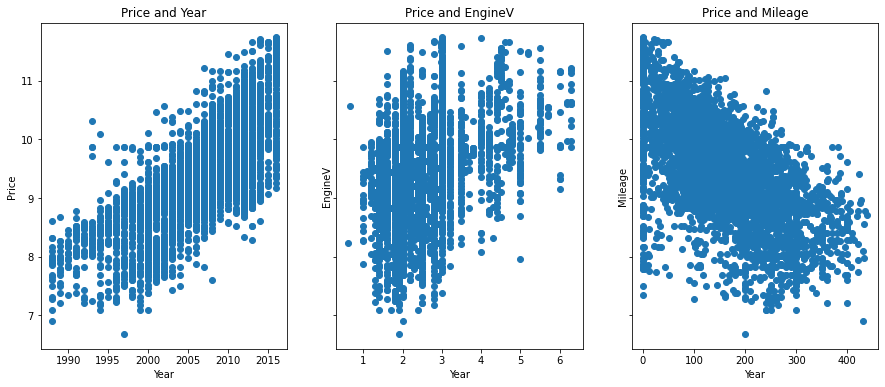

In [68]:
fig, (ax1, ax2, ax3)= plt.subplots(1,3,sharey=True, figsize=(15,6))
ax1.scatter(cleaned_data['Year'], cleaned_data['log_price'])
ax1.set_title('Price and Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax2.scatter(cleaned_data['EngineV'], cleaned_data['log_price'])
ax2.set_title('Price and EngineV')
ax2.set_ylabel('EngineV')
ax2.set_xlabel('Year')
ax3.scatter(cleaned_data['Mileage'], cleaned_data['log_price'])
ax3.set_title('Price and Mileage')
ax3.set_xlabel('Year')
ax3.set_ylabel('Mileage')

plt.show()

In [69]:
cleaned_data.drop(['Price'],axis=1,inplace=True)

In [70]:
cleaned_data

Brand       Body  Mileage Engine Type Registration  Year  \
0               BMW      sedan      277      Petrol          yes  1991   
1     Mercedes-Benz        van      427      Diesel          yes  1999   
2     Mercedes-Benz      sedan      358         Gas          yes  2003   
3              Audi  crossover      240      Petrol          yes  2007   
4            Toyota  crossover      120      Petrol          yes  2011   
...             ...        ...      ...         ...          ...   ...   
4167     Volkswagen        van      163      Diesel          yes  2008   
4168         Toyota      sedan       35      Petrol          yes  2014   
4169            BMW      sedan        1      Petrol          yes  1999   
4170         Toyota      sedan       31      Petrol          yes  2014   
4171     Volkswagen        van      124      Diesel          yes  2013   

                  Model   EngineV  log_price  
0                   320  2.000000   8.342840  
1          Sprinter 212  2.900000   8.974618  
2                 S 500  5.000000   9.495519  
3                    Q7  4.200000  10.043249  
4                 Rav 4  2.000000   9.814656  
...                 ...       ...        ...  
4167   T5 (Transporter)  2.500000   9.350102  
4168            Corolla  1.600000   9.792556  
4169                535  3.500000   8.779557  
4170            Corolla  2.790734   9.560997  
4171  T5 (Transporter)   2.000000   9.510445  

[4172 rows x 9 columns]

### Multicollinearity

In [79]:
cleaned_data.columns.values

array(['Brand', 'Body', 'Mileage', 'Engine Type', 'Registration', 'Year',
       'Model', 'EngineV', 'log_price'], dtype=object)

<b>Note: One of the best ways to check for multicollinearity is through VIF (variance inflation factor) </b>

VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors.

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
variables = cleaned_data[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [84]:
variables

Mileage  Year   EngineV
0         277  1991  2.000000
1         427  1999  2.900000
2         358  2003  5.000000
3         240  2007  4.200000
4         120  2011  2.000000
...       ...   ...       ...
4167      163  2008  2.500000
4168       35  2014  1.600000
4169        1  1999  3.500000
4170       31  2014  2.790734
4171      124  2013  2.000000

[4172 rows x 3 columns]

In [86]:
vif

VIF features
0   3.629733  Mileage
1  10.716610     Year
2   7.960148  EngineV

If
1. vif = 1: no multicollinearly
2. if 1 < vif < 5: perfectly okay
3. if 5 < vif: unacceptable

In [87]:
data_no_multicollinearity = cleaned_data.drop(['Year'], axis=1)

In [88]:
data_no_multicollinearity

Brand       Body  Mileage Engine Type Registration  \
0               BMW      sedan      277      Petrol          yes   
1     Mercedes-Benz        van      427      Diesel          yes   
2     Mercedes-Benz      sedan      358         Gas          yes   
3              Audi  crossover      240      Petrol          yes   
4            Toyota  crossover      120      Petrol          yes   
...             ...        ...      ...         ...          ...   
4167     Volkswagen        van      163      Diesel          yes   
4168         Toyota      sedan       35      Petrol          yes   
4169            BMW      sedan        1      Petrol          yes   
4170         Toyota      sedan       31      Petrol          yes   
4171     Volkswagen        van      124      Diesel          yes   

                  Model   EngineV  log_price  
0                   320  2.000000   8.342840  
1          Sprinter 212  2.900000   8.974618  
2                 S 500  5.000000   9.495519  
3                    Q7  4.200000  10.043249  
4                 Rav 4  2.000000   9.814656  
...                 ...       ...        ...  
4167   T5 (Transporter)  2.500000   9.350102  
4168            Corolla  1.600000   9.792556  
4169                535  3.500000   8.779557  
4170            Corolla  2.790734   9.560997  
4171  T5 (Transporter)   2.000000   9.510445  

[4172 rows x 8 columns]

### Creating dummy variables

In [92]:
cleaned_data.drop(['Model'], axis=1,inplace=True)
cleaned_data

Brand       Body  Mileage Engine Type Registration  Year  \
0               BMW      sedan      277      Petrol          yes  1991   
1     Mercedes-Benz        van      427      Diesel          yes  1999   
2     Mercedes-Benz      sedan      358         Gas          yes  2003   
3              Audi  crossover      240      Petrol          yes  2007   
4            Toyota  crossover      120      Petrol          yes  2011   
...             ...        ...      ...         ...          ...   ...   
4167     Volkswagen        van      163      Diesel          yes  2008   
4168         Toyota      sedan       35      Petrol          yes  2014   
4169            BMW      sedan        1      Petrol          yes  1999   
4170         Toyota      sedan       31      Petrol          yes  2014   
4171     Volkswagen        van      124      Diesel          yes  2013   

       EngineV  log_price  
0     2.000000   8.342840  
1     2.900000   8.974618  
2     5.000000   9.495519  
3     4.200000  10.043249  
4     2.000000   9.814656  
...        ...        ...  
4167  2.500000   9.350102  
4168  1.600000   9.792556  
4169  3.500000   8.779557  
4170  2.790734   9.560997  
4171  2.000000   9.510445  

[4172 rows x 8 columns]

In [93]:
data_with_dummies = pd.get_dummies(cleaned_data, drop_first = True)
data_with_dummies

Mileage  Year   EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0         277  1991  2.000000   8.342840          1                    0   
1         427  1999  2.900000   8.974618          0                    1   
2         358  2003  5.000000   9.495519          0                    1   
3         240  2007  4.200000  10.043249          0                    0   
4         120  2011  2.000000   9.814656          0                    0   
...       ...   ...       ...        ...        ...                  ...   
4167      163  2008  2.500000   9.350102          0                    0   
4168       35  2014  1.600000   9.792556          0                    0   
4169        1  1999  3.500000   8.779557          1                    0   
4170       31  2014  2.790734   9.560997          0                    0   
4171      124  2013  2.000000   9.510445          0                    0   

      Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                    0              0             0                 0   
1                    0              0             0                 0   
2                    0              0             0                 0   
3                    0              0             0                 0   
4                    0              0             1                 0   
...                ...            ...           ...               ...   
4167                 0              0             0                 1   
4168                 0              0             1                 0   
4169                 0              0             0                 0   
4170                 0              0             1                 0   
4171                 0              0             0                 1   

      Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  \
0              0           0           1           0         0   
1              0           0           0           0         1   
2              0           0           1           0         0   
3              0           0           0           0         0   
4              0           0           0           0         0   
...          ...         ...         ...         ...       ...   
4167           0           0           0           0         1   
4168           0           0           1           0         0   
4169           0           0           1           0         0   
4170           0           0           1           0         0   
4171           0           0           0           0         1   

      Engine Type_Gas  Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                   0                  0                   1                 1  
1                   0                  0                   0                 1  
2                   1                  0                   0                 1  
3                   0                  0                   1                 1  
4                   0                  0                   1                 1  
...               ...                ...                 ...               ...  
4167                0                  0                   0                 1  
4168                0                  0                   1                 1  
4169                0                  0                   1                 1  
4170                0                  0                   1                 1  
4171                0                  0                   0                 1  

[4172 rows x 19 columns]

In [94]:
variables = data_with_dummies[data_with_dummies.columns.values]
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif2['features'] = variables.columns

In [95]:
vif2

VIF             features
0     7.638000              Mileage
1   468.534464                 Year
2    13.805248              EngineV
3   444.917729            log_price
4     2.612896            Brand_BMW
5     3.156071  Brand_Mercedes-Benz
6     2.023508     Brand_Mitsubishi
7     2.587086        Brand_Renault
8     2.461933         Brand_Toyota
9     3.466798     Brand_Volkswagen
10    1.767792           Body_hatch
11    1.697674           Body_other
12    3.973925           Body_sedan
13    1.985417           Body_vagon
14    2.790659             Body_van
15    1.733840      Engine Type_Gas
16    1.119595    Engine Type_Other
17    2.597197   Engine Type_Petrol
18   17.757833     Registration_yes

### Rearrange a bit

In [96]:
data_with_dummies.columns.values

array(['Mileage', 'Year', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [97]:
cols = ['log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [98]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277      2.0          1                    0   
1   8.974618      427      2.9          0                    1   
2   9.495519      358      5.0          0                    1   
3  10.043249      240      4.2          0                    0   
4   9.814656      120      2.0          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

### Linear Regression Model

In [99]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [101]:
inputs.head()

Mileage  EngineV  Brand_BMW  Brand_Mercedes-Benz  Brand_Mitsubishi  \
0      277      2.0          1                    0                 0   
1      427      2.9          0                    1                 0   
2      358      5.0          0                    1                 0   
3      240      4.2          0                    0                 0   
4      120      2.0          0                    0                 0   

   Brand_Renault  Brand_Toyota  Brand_Volkswagen  Body_hatch  Body_other  \
0              0             0                 0           0           0   
1              0             0                 0           0           0   
2              0             0                 0           0           0   
3              0             0                 0           0           0   
4              0             1                 0           0           0   

   Body_sedan  Body_vagon  Body_van  Engine Type_Gas  Engine Type_Other  \
0           1           0         0                0                  0   
1           0           0         1                0                  0   
2           1           0         0                1                  0   
3           0           0         0                0                  0   
4           0           0         0                0                  0   

   Engine Type_Petrol  Registration_yes  
0                   1                 1  
1                   0                 1  
2                   0                 1  
3                   1                 1  
4                   1                 1

### Scaling the data

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scalar = StandardScaler()
scalar.fit(inputs)

StandardScaler()

In [104]:
scalar.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [105]:
inputs_scaled = scalar.transform(inputs)

In [106]:
inputs_scaled

array([[ 1.23015136, -0.50819428,  2.27411469, ..., -0.18975498,
         1.34867302,  0.32066874],
       [ 2.77871925,  0.45020897, -0.43973156, ..., -0.18975498,
        -0.74146957,  0.32066874],
       [ 2.06637802,  2.68648323, -0.43973156, ..., -0.18975498,
        -0.74146957,  0.32066874],
       ...,
       [-1.61921357,  1.08914447,  2.27411469, ..., -0.18975498,
         1.34867302,  0.32066874],
       [-1.3095    ,  0.33385265, -0.43973156, ..., -0.18975498,
         1.34867302,  0.32066874],
       [-0.3493879 , -0.50819428, -0.43973156, ..., -0.18975498,
        -0.74146957,  0.32066874]])

In [107]:
inputs_scaled.shape

(4172, 17)

### Train Test Split

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.33, random_state=365)

### Create the regression model

In [140]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [141]:
y_hat = reg.predict(X_train)
y_hat

array([ 8.57114555,  8.5812162 ,  8.28525584, ..., 10.93563302,
       10.44210938,  8.81456335])

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions(y_hat)')

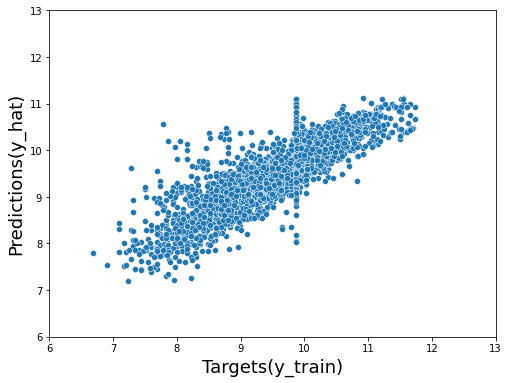

In [142]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(y_train, y_hat,ax=ax)
ax.set_xlim(6,13)
ax.set_ylim(6,13)
ax.set_xlabel('Targets(y_train)', size=18)
ax.set_ylabel('Predictions(y_hat)', size=18)

### Residual Plot

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

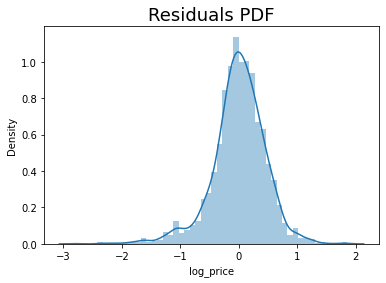

In [143]:
sns.distplot(y_train-y_hat)
plt.title('Residuals PDF', size=18)

In [145]:
reg.score(X_train,y_train)

0.7148484070350881

### Finding the weights and biases

In [146]:
for item in dir(reg):
    if item[0]!='_':
        print(item)

coef_
copy_X
fit
fit_intercept
get_params
intercept_
n_features_in_
n_jobs
normalize
positive
predict
rank_
score
set_params
singular_


In [147]:
print(f'Intercept: {reg.intercept_}')
print(f'Coefficients: {reg.coef_}')

Intercept: 9.432985978729123
Coefficients: [-0.43355904  0.2011005   0.02986094  0.00754913 -0.11381025 -0.17377798
 -0.04625763 -0.07533908 -0.12412072 -0.08227406 -0.17057535 -0.08913518
 -0.13574972 -0.11976993 -0.03775719 -0.13103316  0.30777067]


In [148]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Featres'])
reg_summary['Weights'] = reg.coef_
reg_summary

Featres   Weights
0               Mileage -0.433559
1               EngineV  0.201101
2             Brand_BMW  0.029861
3   Brand_Mercedes-Benz  0.007549
4      Brand_Mitsubishi -0.113810
5         Brand_Renault -0.173778
6          Brand_Toyota -0.046258
7      Brand_Volkswagen -0.075339
8            Body_hatch -0.124121
9            Body_other -0.082274
10           Body_sedan -0.170575
11           Body_vagon -0.089135
12             Body_van -0.135750
13      Engine Type_Gas -0.119770
14    Engine Type_Other -0.037757
15   Engine Type_Petrol -0.131033
16     Registration_yes  0.307771

### Testing

In [150]:
y_hat_test = reg.predict(X_test)
y_hat_test

array([ 9.67091424, 10.30202611,  9.06621566, ...,  9.61328003,
       11.00144811,  9.22790326])

C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predictions(y_hat)')

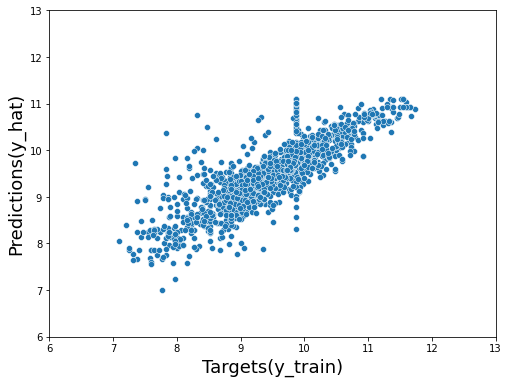

In [162]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(y_test, y_hat_test,ax=ax)
ax.set_xlim(6,13)
ax.set_ylim(6,13)
ax.set_xlabel('Targets(y_train)', size=18)
ax.set_ylabel('Predictions(y_hat)', size=18)

In [163]:
df = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df.head()

Predictions
0  15849.832984
1  29792.921487
2   8657.797646
3  14410.046647
4  17231.860922

In [165]:
df['Target'] = np.exp(y_test)

In [166]:
df

Predictions   Target
0     15849.832984      NaN
1     29792.921487   7900.0
2      8657.797646      NaN
3     14410.046647      NaN
4     17231.860922      NaN
...            ...      ...
1372  38440.293603  10700.0
1373  28478.070139      NaN
1374  14962.166081      NaN
1375  59960.909127      NaN
1376  10177.180176  34500.0

[1377 rows x 2 columns]

In [170]:
y_test = y_test.reset_index(drop=True)
y_test

0       10.232791
1       10.714418
2        8.948976
3        9.698920
4        9.998752
          ...    
1372     9.873994
1373     9.169518
1374    10.126631
1375     9.873994
1376     9.268609
Name: log_price, Length: 1377, dtype: float64

In [171]:
df['Target'] = np.exp(y_test)

In [172]:
df

Predictions        Target
0     15849.832984  27800.000000
1     29792.921487  45000.000000
2      8657.797646   7700.000000
3     14410.046647  16300.000000
4     17231.860922  21999.000000
...            ...           ...
1372  38440.293603  19418.746935
1373  28478.070139   9600.000000
1374  14962.166081  25000.000000
1375  59960.909127  19418.746935
1376  10177.180176  10600.000000

[1377 rows x 2 columns]

In [173]:
df.describe()

Predictions         Target
count   1377.000000    1377.000000
mean   16481.590192   18136.332232
std    12594.542339   18455.766447
min     1087.154587    1200.000000
25%     8123.806654    7300.000000
50%    12444.664370   11900.000000
75%    20501.121689   20800.000000
max    66101.898859  124000.000000

In [177]:
df['Residual'] = df['Target'] - df['Predictions']
df['Difference%'] = np.abs(df['Residual']/df['Target'] * 100)

In [178]:
pd.options.display.max_rows=999
pd.set_option('display.float_format', lambda x: '%.2f'%x)
df.sort_values(by='Difference%', )

Predictions   Target  Residual  Difference%
29       10700.70 10700.00     -0.70         0.01
42       16495.14 16500.00      4.86         0.03
498      37476.57 37500.00     23.43         0.06
536       3696.26  3700.00      3.74         0.10
1136     14275.18 14299.00     23.82         0.17
...           ...      ...       ...          ...
1205     18809.47  2900.00 -15909.47       548.60
93       35942.25  4800.00 -31142.25       648.80
323      16696.74  1550.00 -15146.74       977.21
132      47304.20  4100.00 -43204.20      1053.76
499      32152.60  2500.00 -29652.60      1186.10

[1377 rows x 4 columns]